# Get Data

In [83]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

## Extracting signal from .dat files

### The signal was extracted and turned into a numpy array and then plotted using the time in seconds as the x-axis

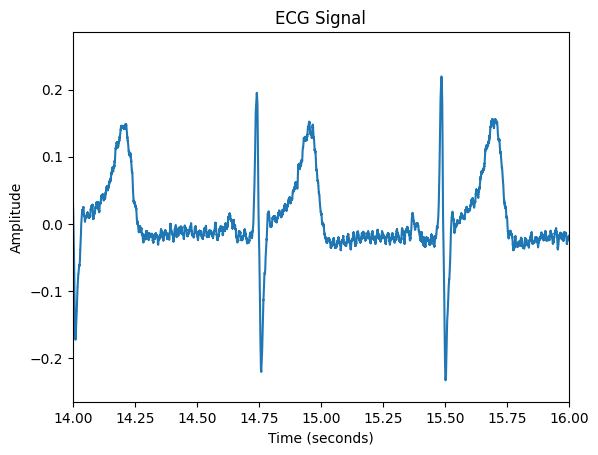

In [84]:

# Load the record using wfdb.rdrecord
record = wfdb.rdrecord('Resting/ECGPCG0005')

# Extract the ECG signal from the record
ecg_signal = record.p_signal[:, 0]  # Assuming ECG signal is in the first channel (0-indexed)


# Convert the ECG segment to a NumPy array
ecg_array = np.array(ecg_signal)

# Get the sampling rate
sampling_rate = record.fs

# Calculate the corresponding time axis
time = np.arange(0, len(ecg_array)) / sampling_rate

# Plot the ECG signal against time
plt.plot(time, ecg_array)

# Add labels and title to the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('ECG Signal')

# Set the limits for the zoomed-in region
zoom_start_time = 14  # Replace with the desired start time of the zoomed-in region
zoom_end_time = 16 # Replace with the desired end time of the zoomed-in region

# Adjust the limits of the x-axis and y-axis
plt.xlim(zoom_start_time, zoom_end_time)

# Display the plot
plt.show()

## The fourier transform of the signal is taken to show the spectral plot, therefore highlighting the most significant frequencies

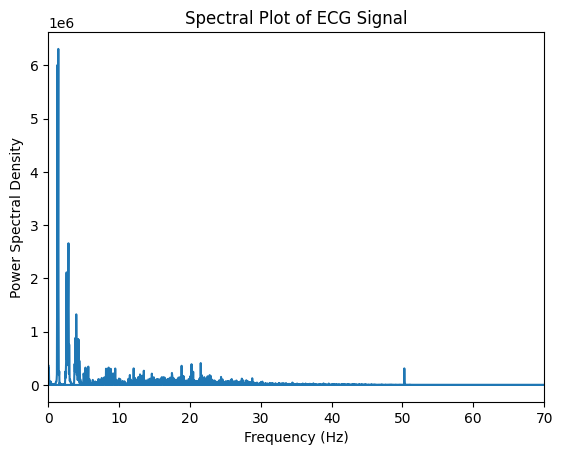

In [85]:
# Perform the Fourier transform
fourier_transform = np.fft.fft(ecg_array)

# Calculate the power spectral density (PSD)
power_spectrum = np.abs(fourier_transform) ** 2

# Get the sampling rate
sampling_rate = record.fs

# Create the frequency axis
frequency_bins = np.fft.fftfreq(len(ecg_array), d=1/sampling_rate)

# Plot the PSD
plt.plot(frequency_bins, power_spectrum)

# Set the x-axis limits to display positive frequencies only
plt.xlim(0, sampling_rate / 2)

# Add labels and title to the plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Spectral Plot of ECG Signal')

# Set the limits for the zoomed-in region
zoom_start_freq = 0  # Replace with the desired start frequency of the zoomed-in region
zoom_end_freq = 70  # Replace with the desired end frequency of the zoomed-in region

# Adjust the limits of the x-axis and/or y-axis for zooming in
plt.xlim(zoom_start_freq, zoom_end_freq)

# Display the plot
plt.show()

## Now the y-axis is changed to percentage affecting the amplitude vs. the frequency

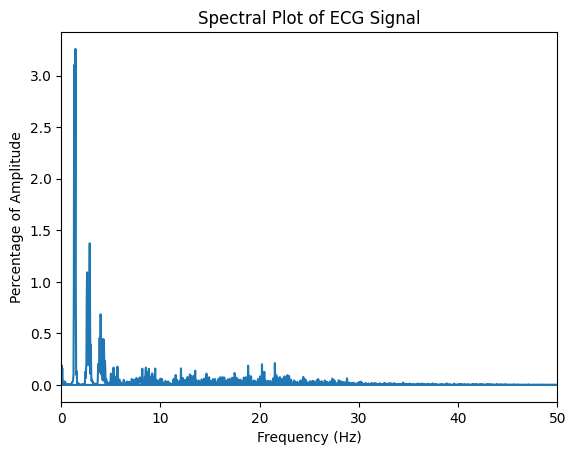

In [86]:
# Normalize the power spectrum to sum up to 100
normalized_spectrum = (power_spectrum / np.sum(power_spectrum)) * 100

# Plot the spectral plot with the y-axis as a percentage
plt.plot(frequency_bins, normalized_spectrum)

# Set the limits for the zoomed-in region
zoom_start_freq = 0  # Replace with the desired start frequency of the zoomed-in region
zoom_end_freq = 50# Replace with the desired end frequency of the zoomed-in region

# Adjust the limits of the x-axis for zooming in
plt.xlim(zoom_start_freq, zoom_end_freq)

# Add labels and title to the plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percentage of Amplitude')
plt.title('Spectral Plot of ECG Signal')

# Display the plot
plt.show()